# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but we do have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020) (whenever COVID isn't ruining things, at least).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [388]:
import pandas as pd
#! pip install xlrd

## 1. Read in the file using pandas, and look at the first five rows

In [389]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25, na_values=['-'])
df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.


* **TIP:** Look at the documentation for `read_excel` and `read_csv` to see if there's anything that allows you to skip rows*
* **TIP:** The first year should be 801 AD, and it should not have any dates or anything.

In [390]:
df.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

## 3. Look at a random selection of 10 rows of data

In [391]:
df.sample(10)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
914,1715,107.0,417.0,3.0,2.0,CHIONIN-NICHIKAGAMI
1025,1826,109.0,419.0,3.0,2.0,RAI-SANYO-NIPPU
1146,1947,107.0,417.0,4.0,0.0,NEWS-PAPER(ARASHIYAMA)
117,918,NaN,NaN,NaN,NaN,NaN
967,1768,117.0,426.0,4.0,1.0,SADAHARU-KYOKI
713,1514,105.0,415.0,2.0,2.0,MORIMITSU-KOKI
388,1189,NaN,NaN,NaN,NaN,NaN
438,1239,NaN,NaN,NaN,NaN,NaN
237,1038,NaN,NaN,NaN,NaN,NaN
1187,1988,106.0,415.0,3.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

I added `na_values=['-']` in the command where I read the data.

Also before getting started, I clean up the column names:

In [392]:
df.columns = df.columns.str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","").str.replace("-","_")
df

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/2572444116.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","").str.replace("-","_")
/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/2572444116.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.lower().str.replace(" ","_").str.replace("(","").str.replace(")","").str.replace("-","_")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. What source is the most common as a reference?

In [393]:
df.source_code.value_counts()

# The most common source as a reference is 3, which according to the spreadsheet is:

# " 3; Added by Aono and Omoto (1994), J. Agric. Meteorol., 49, 263-272."

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     17
6.0      9
8.0      5
Name: source_code, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [394]:
# To drop the missing values I use the command dropna on the column 'full_flowering_date_doy'
df = df.dropna(subset=['full_flowering_date_doy']) 

In [395]:
df.head()

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU


## 7. Make a histogram of the full-flowering date

<AxesSubplot: >

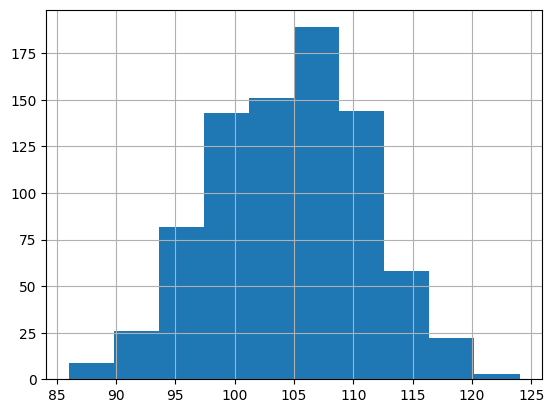

In [396]:
df.full_flowering_date_doy.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot: >

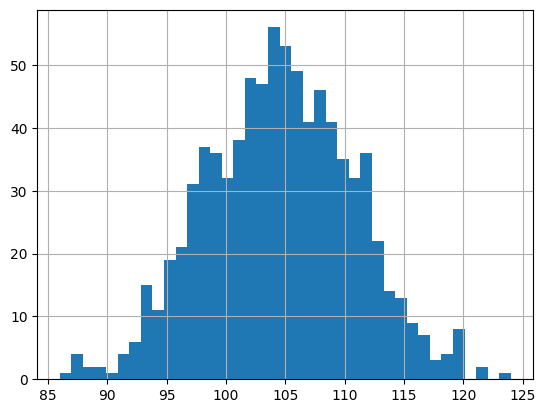

In [397]:
df.full_flowering_date_doy.hist(bins=39)

## 9a. What's the average number of days it takes for the flowers to blossom? 

In [398]:
df.full_flowering_date_doy.mean()
# On average it takes the flowers 104.54 days to blossom (from the January 1st)

104.54050785973398

## 9b. And how many records do we have?

You can actually answer this one and the last one with a single line of code.

I can come up with two different ways of answering this question: either using len on the index (or I guess any other column?) or use .shape and then only ask for the first number of the output list, which is the number of rows (so I don't get the number of columns too)

In [399]:
len(df.index)

827

In [400]:
df.shape[0]

827

## 10. How many days into the year did cherry flowers normally blossom before 1900?



In [401]:
df[df.ad < 1900].full_flowering_date_doy.mean()
# It looks like cherry flowers on average blossomed 105.2 days into the year before 1900

105.20728291316527

## 11. How about after 1900?

In [402]:
df[df.ad > 1900].full_flowering_date_doy.mean()
# After 1900 that number dropped to on average 100.3 days. 

100.3125

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [403]:
# The value 4.0 in the column data_type_code means that the data 
# was from a title in Japanese poetry.

df[df.data_type_code == 4.0].data_type_code.value_counts()

# I could also have done this without sorting the data:
    #df.data_type_code.value_counts()
# and then just pointed out the number of 4's

4.0    39
Name: data_type_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [404]:
df[df.data_type_code == 4.0]
# if I add .ad to the end of the code, I get only the years, but I prefer this table - it is prettier. 

,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU
94,895,104.0,414.0,5.0,4.0,NIHONKIRYAKU
95,896,104.0,413.0,5.0,4.0,NIPPON-SANDAI-JITSUROKU
122,923,104.0,414.0,5.0,4.0,ZOKU-KOKIN-WAKASHU
154,955,89.0,330.0,5.0,4.0,SHUISHO
168,969,98.0,408.0,5.0,4.0,NIHONKIRYAKU
206,1007,106.0,416.0,5.0,4.0,MIDO-KAMPAKUKI
232,1033,102.0,412.0,5.0,4.0,NIHONKIRYAKU
235,1036,104.0,413.0,5.0,4.0,NIHONKIRYAKU
259,1060,108.0,417.0,5.0,4.0,SHIN-SENZAI-WAKASHU


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot: >

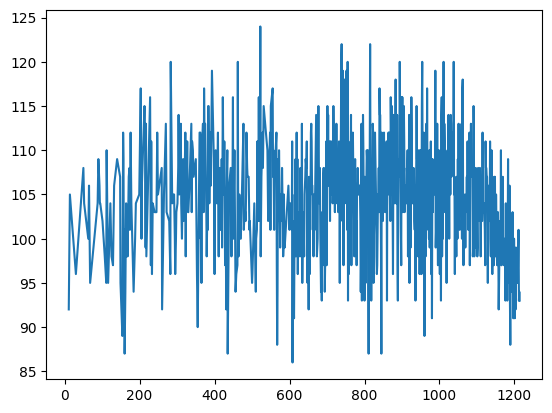

In [405]:
df.full_flowering_date_doy.plot()

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

```python
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()
```

In this case we're only looking at the final 5. You'll probably want to look at more!

<AxesSubplot: >

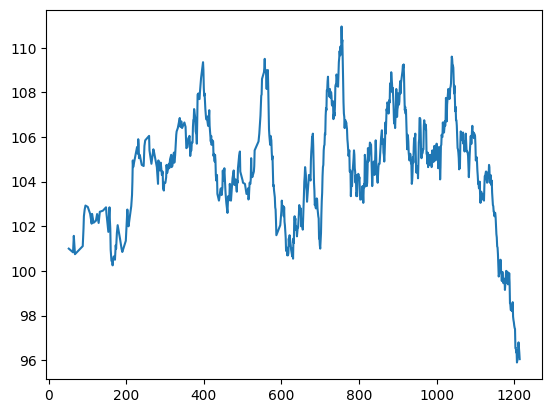

In [406]:
# I start out by giving df.rolling a look. Fun
df.rolling(20, on='ad', min_periods=5).full_flowering_date_doy.mean().tail(1500).plot()

In [407]:
# Then I create the column rolling_date 
# I use a 20 year rolling average, but I have changed the minimum to 1 to include the 
# first years too - smart or not, idk?
df['rolling_date'] = df.rolling(20, on='ad', min_periods=1).full_flowering_date_doy.mean()
df

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/2935235791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_date'] = df.rolling(20, on='ad', min_periods=1).full_flowering_date_doy.mean()


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,92.000000
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,98.500000
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,97.666667
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,100.250000
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.000000
...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.450000
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.800000
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.600000
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.350000


Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

<AxesSubplot: >

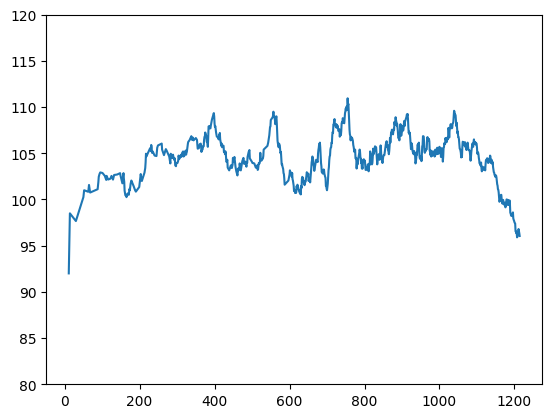

In [408]:
df.rolling_date.plot(ylim=(80, 120))

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime` pandas tries to figure out the date format automatically. If that doesn't work, you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values.
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [409]:
# First I convert the full_flowering_date column from float to datetime format. I create it as a new variable 
# beacuse I don't like overwriting the original + it allows me to check them against each other!
df['date'] = pd.to_datetime(df.full_flowering_date, format='%m%d')

# It is not really responding to my format request though....

df.head(10)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/26816498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df.full_flowering_date, format='%m%d')


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,date
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,92.000000,1900-04-01
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,98.500000,1900-04-15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,97.666667,1900-04-06
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,100.250000,1900-04-18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.000000,1900-04-14
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,100.833333,1900-04-09
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,101.571429,1900-04-16
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,100.750000,1900-04-05
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,101.111111,1900-04-14
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,101.900000,1900-04-19


In [410]:
# And then I convert the dates into months and create a new column.
df['month'] = df.date.dt.strftime("%B")
df.head(10)

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/2913338455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.date.dt.strftime("%B")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,date,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,92.000000,1900-04-01,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,98.500000,1900-04-15,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,97.666667,1900-04-06,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,100.250000,1900-04-18,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.000000,1900-04-14,April
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,100.833333,1900-04-09,April
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU,101.571429,1900-04-16,April
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU,100.750000,1900-04-05,April
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU,101.111111,1900-04-14,April
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU,101.900000,1900-04-19,April


### 17. Using your new column, how many blossomings happened in each month?

In [411]:
df.month.value_counts()
# It looks like most of the blossomings happened in April while a few took place in March and May. 

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot: >

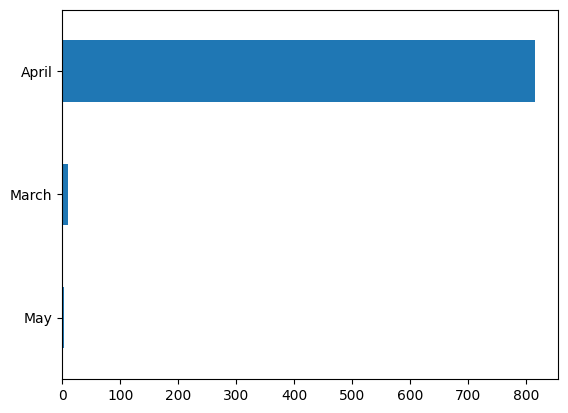

In [412]:
df.month.value_counts().sort_values(ascending = True).plot(kind='barh')

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` Depending on what you did above, it might be a little tougher since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [413]:
df['day_of_month'] = df.date.dt.strftime("%-d")
df

/var/folders/hx/m3n3wwr91yg_snnv68ynqsp80000gn/T/ipykernel_6125/107625387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_month'] = df.date.dt.strftime("%-d")


,ad,full_flowering_date_doy,full_flowering_date,source_code,data_type_code,reference_name,rolling_date,date,month,day_of_month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,92.000000,1900-04-01,April,1
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,98.500000,1900-04-15,April,15
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,97.666667,1900-04-06,April,6
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,100.250000,1900-04-18,April,18
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.000000,1900-04-14,April,14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.450000,1900-04-09,April,9
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.800000,1900-04-10,April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.600000,1900-04-03,April,3
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.350000,1900-04-04,April,4


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new string-like column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above, or *just totally skip this one if you have an actual datetime column*.

In [414]:
# I managed to create an actual daytime column. The year is wrong though.... 

In [417]:
df.dtypes

ad                                  int64
full_flowering_date_doy           float64
full_flowering_date               float64
source_code                       float64
data_type_code                    float64
reference_name                     object
rolling_date                      float64
date                       datetime64[ns]
month                              object
day_of_month                       object
dtype: object

# YOU ARE DONE.

And **incredible.**